<a href="https://colab.research.google.com/github/PacktPublishing/Modern-Computer-Vision-with-PyTorch-2E/blob/main/Chapter17/Depth-to-Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
# Install all the dependencies
%%capture
%pip -q install diffusers accelerate torch-snippets torchinfo lovely_tensors
!wget https://png.pngtree.com/thumb_back/fw800/background/20230811/pngtree-two-glasses-with-a-lime-wedge-in-them-next-to-a-image_13034833.jpg -O lime_juice.png

In [ ]:
import torch
import requests
from PIL import Image
from torch_snippets import *

from diffusers import StableDiffusionDepth2ImgPipeline

In [ ]:
pipe = StableDiffusionDepth2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-depth",
    torch_dtype=torch.float16,
)
pipe.to("cuda")

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

StableDiffusionDepth2ImgPipeline {
  "_class_name": "StableDiffusionDepth2ImgPipeline",
  "_diffusers_version": "0.25.0",
  "_name_or_path": "stabilityai/stable-diffusion-2-depth",
  "depth_estimator": [
    "transformers",
    "DPTForDepthEstimation"
  ],
  "feature_extractor": [
    "transformers",
    "DPTImageProcessor"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

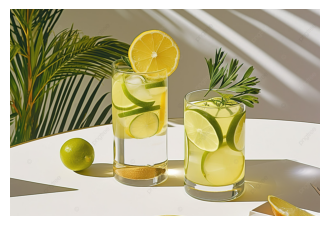

(960, 640)

In [ ]:
from torch_snippets import *
import numpy as np, cv2
init_image = Image.open('/content/lime_juice.png')
show(init_image, sz=4)
init_image.size

In [ ]:
from torch_snippets import resize
init_image = Image.open('/content/lime_juice.png')
im = np.array(init_image)[:,:,:3]
im = resize(im, 1.3)
cv2.imwrite('test.jpg', im)
im.shape

(832, 1248, 3)

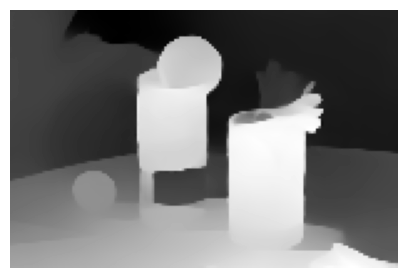

  0%|          | 0/70 [00:00<?, ?it/s]

In [ ]:
init_image = Image.open('/content/test.jpg')
prompt = "glasses of lime juice with skyline view in background in a cool afternoon"
n_propmt = "bad, deformed, ugly, bad anotomy"
image = pipe(prompt=prompt, image=init_image, negative_prompt=n_propmt, strength=0.7, num_inference_steps = 100).images[0]

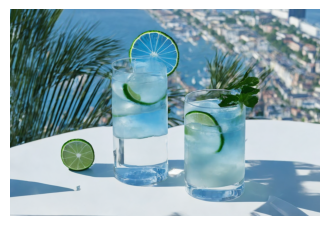

In [ ]:
show(image, sz=4)

In [ ]:
!ln -s /usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_depth2img.py

In [ ]:
from torchinfo import summary
summary(pipe.unet)

Layer (type:depth-idx)                                                           Param #
UNet2DConditionModel                                                             --
├─Conv2d: 1-1                                                                    14,720
├─Timesteps: 1-2                                                                 --
├─TimestepEmbedding: 1-3                                                         --
│    └─LoRACompatibleLinear: 2-1                                                 410,880
│    └─SiLU: 2-2                                                                 --
│    └─LoRACompatibleLinear: 2-3                                                 1,639,680
├─ModuleList: 1-4                                                                --
│    └─CrossAttnDownBlock2D: 2-4                                                 --
│    │    └─ModuleList: 3-1                                                      5,420,160
│    │    └─ModuleList: 3-2                     

In [ ]:
pipe.unet.in_channels

<ipython-input-18-ffded28341af>:1: FutureWarning: Accessing config attribute `in_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'in_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.in_channels'.
  pipe.unet.in_channels


5

In [ ]:
pipe.unet.out_channels

<ipython-input-17-8fe0e8b1ffbf>:1: FutureWarning: Accessing config attribute `out_channels` directly via 'UNet2DConditionModel' object attribute is deprecated. Please access 'out_channels' over 'UNet2DConditionModel's config object instead, e.g. 'unet.config.out_channels'.
  pipe.unet.out_channels


4

In [ ]:
s